In [31]:
import cv2
import numpy as np
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image
import os
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import pickle

In [32]:
app=FaceAnalysis(name='buffalo_l',
                     providers=['CPUExecutionProvider'])
app.prepare(ctx_id=0,det_size=(640,640))

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Samyak/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Samyak/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Samyak/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Samyak/.insightface\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Samyak/.insightface\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112]

In [33]:
# a = []
# b = []
# for file in os.listdir("train_data"):
#   filename = os.fsdecode(file)
#   if filename == '.ipynb_checkpoints':
#     continue
#   a.append(filename)
#   img=cv2.imread("train_data/" + filename)
#   faces = app.get(img , max_num =1)
#   b.append(faces[0]['embedding'])

In [34]:
data=pickle.load(
    open('embeddings.pkl','rb')
)

a=data[0]
b=data[1]

In [35]:
present = set()

c:\Users\Samyak\AppData\Local\Programs\Python\Python311\Lib\site-packages\insightface\utils\transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


220001001.png 0.64113
220001060.png 0.2839476
220001004.png 0.7269601
220001011.png 0.5455277
220001061.png 0.6746639
220001003.png 0.79111964
220001076.png 0.69971114
220001026.png 0.58397675
220001045.png 0.7316746
220001032.png 0.2957517
220001035.png 0.41703293
220001005.png 0.51105595
220001025.png 0.41549698
220001017.png 0.39620987
220001008.png 0.45686162
220001009.png 0.42254847
220001048.png 0.34154835
220001082.png 0.49956498
220001006.png 0.58929354
220002018.png 0.45135805
220001080.png 0.43987
220001081.png 0.5902318
220001066.png 0.35212785
220002018.png 0.17707518
220001042.png 0.4669808


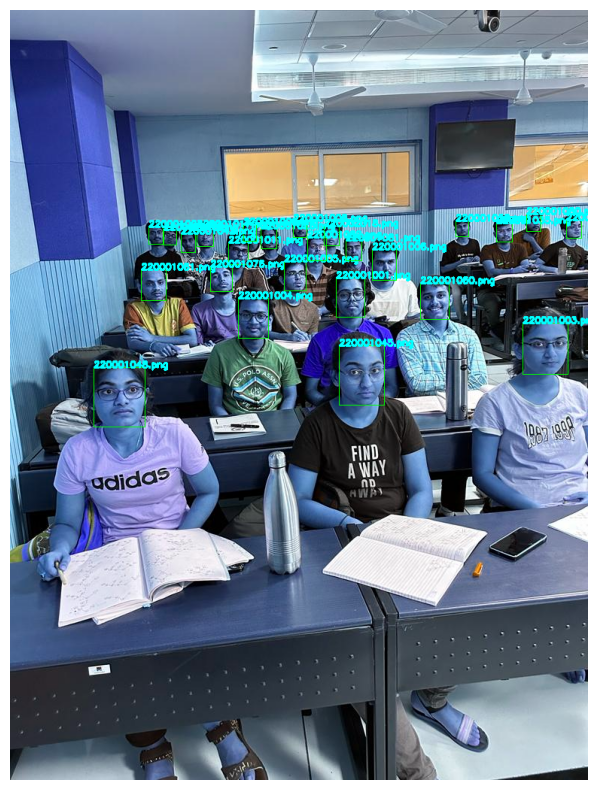

In [36]:
for images in os.listdir("Test_Images"):
  fileName = os.fsdecode(images)
  img=cv2.imread("Test_Images/" + fileName)
  faces = app.get(img)
  for face in faces :
    embeddings = face['embedding']
    match = -1
    matchDistance = -100
    matchedImage = ""
    for i in range(len(a)):
        cosine = np.dot(embeddings, b[i])/(norm(embeddings)*norm(b[i]))
        if cosine > matchDistance:
            matchDistance = cosine
            matchedImage = a[i]
    print(matchedImage, matchDistance)
    present.add(matchedImage)
    # print(face['bbox'][0] , face['bbox'][1] , face['bbox'][2] ,face['bbox'][3])
    cv2.rectangle(img , (int(face['bbox'][0]) , int(face['bbox'][1]) ) , (int(face['bbox'][2]) , int(face['bbox'][3]) ) , (0 , 255 , 0) , 1)
    img = cv2.putText(img, matchedImage, (int(face['bbox'][0]) , int(face['bbox'][1])),
                      cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,255,255), 2)
    
  plt.figure(figsize=(20,10))
  plt.imshow(img)
  plt.axis('off')